## Data Preparation

In [5]:
# install scikit-learn, tensorflow, pandas, matplotlib, numpy

'conda' 不是內部或外部命令、可執行的程式或批次檔。


In [6]:
import pandas as pd

output_path ='../2019_ML_hardness_exp.csv'
path = output_path
df = pd.read_csv(output_path)
display(df.head())

,Unnamed: 0,Al,Co,Cr,Cu,Fe,Ni,"Hardness, HV"
0,1,18.2,9.1,18.2,18.2,18.2,18.2,473
1,2,18.2,18.2,9.1,18.2,18.2,18.2,367
2,3,18.2,18.2,18.2,18.2,9.1,18.2,418
3,4,18.2,18.2,18.2,18.2,18.2,9.1,423
4,5,5.3,21.1,21.1,0.0,26.3,26.3,168


In [7]:
df.info()
df.describe(include='all').round(2)

#round 函数在 Python（包括 Pandas 库中）的功能是对浮点数进行四舍五入到给定的精度。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    155 non-null    int64  
 1   Al            155 non-null    float64
 2   Co            155 non-null    float64
 3   Cr            155 non-null    float64
 4   Cu            155 non-null    float64
 5   Fe            155 non-null    float64
 6   Ni            155 non-null    float64
 7   Hardness, HV  155 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 9.8 KB


,Unnamed: 0,Al,Co,Cr,Cu,Fe,Ni,"Hardness, HV"
count,155.00,155.00,155.00,155.00,155.00,155.00,155.00,155.00
mean,78.00,16.90,14.57,18.52,10.66,18.08,21.31,422.08
std,44.89,11.26,10.23,8.53,9.20,7.44,9.21,187.67
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,110.00
25%,39.50,9.55,0.00,15.10,0.00,15.00,15.95,233.50
50%,78.00,16.70,16.70,18.50,11.10,18.20,21.30,472.00
75%,116.50,22.75,21.80,22.60,18.20,22.20,25.45,558.00
max,155.00,46.20,42.90,55.60,29.00,46.90,50.00,775.00


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y= df['Hardness, HV']
x= df.drop(columns=['Hardness, HV','Unnamed: 0'])
display(x.head(5))
# print(set(x), set(y))

,Al,Co,Cr,Cu,Fe,Ni
0,18.2,9.1,18.2,18.2,18.2,18.2
1,18.2,18.2,9.1,18.2,18.2,18.2
2,18.2,18.2,18.2,18.2,9.1,18.2
3,18.2,18.2,18.2,18.2,18.2,9.1
4,5.3,21.1,21.1,0.0,26.3,26.3


In [9]:
# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

##  data visualization


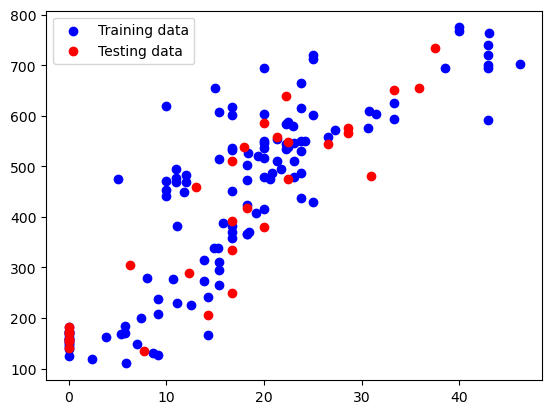

In [10]:
plt.scatter(x_train['Al'], y_train, color='blue', label='Training data')
plt.scatter(x_test['Al'], y_test, color='red', label='Testing data')
plt.legend()
plt.show()

C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

<Figure size 800x800 with 0 Axes>

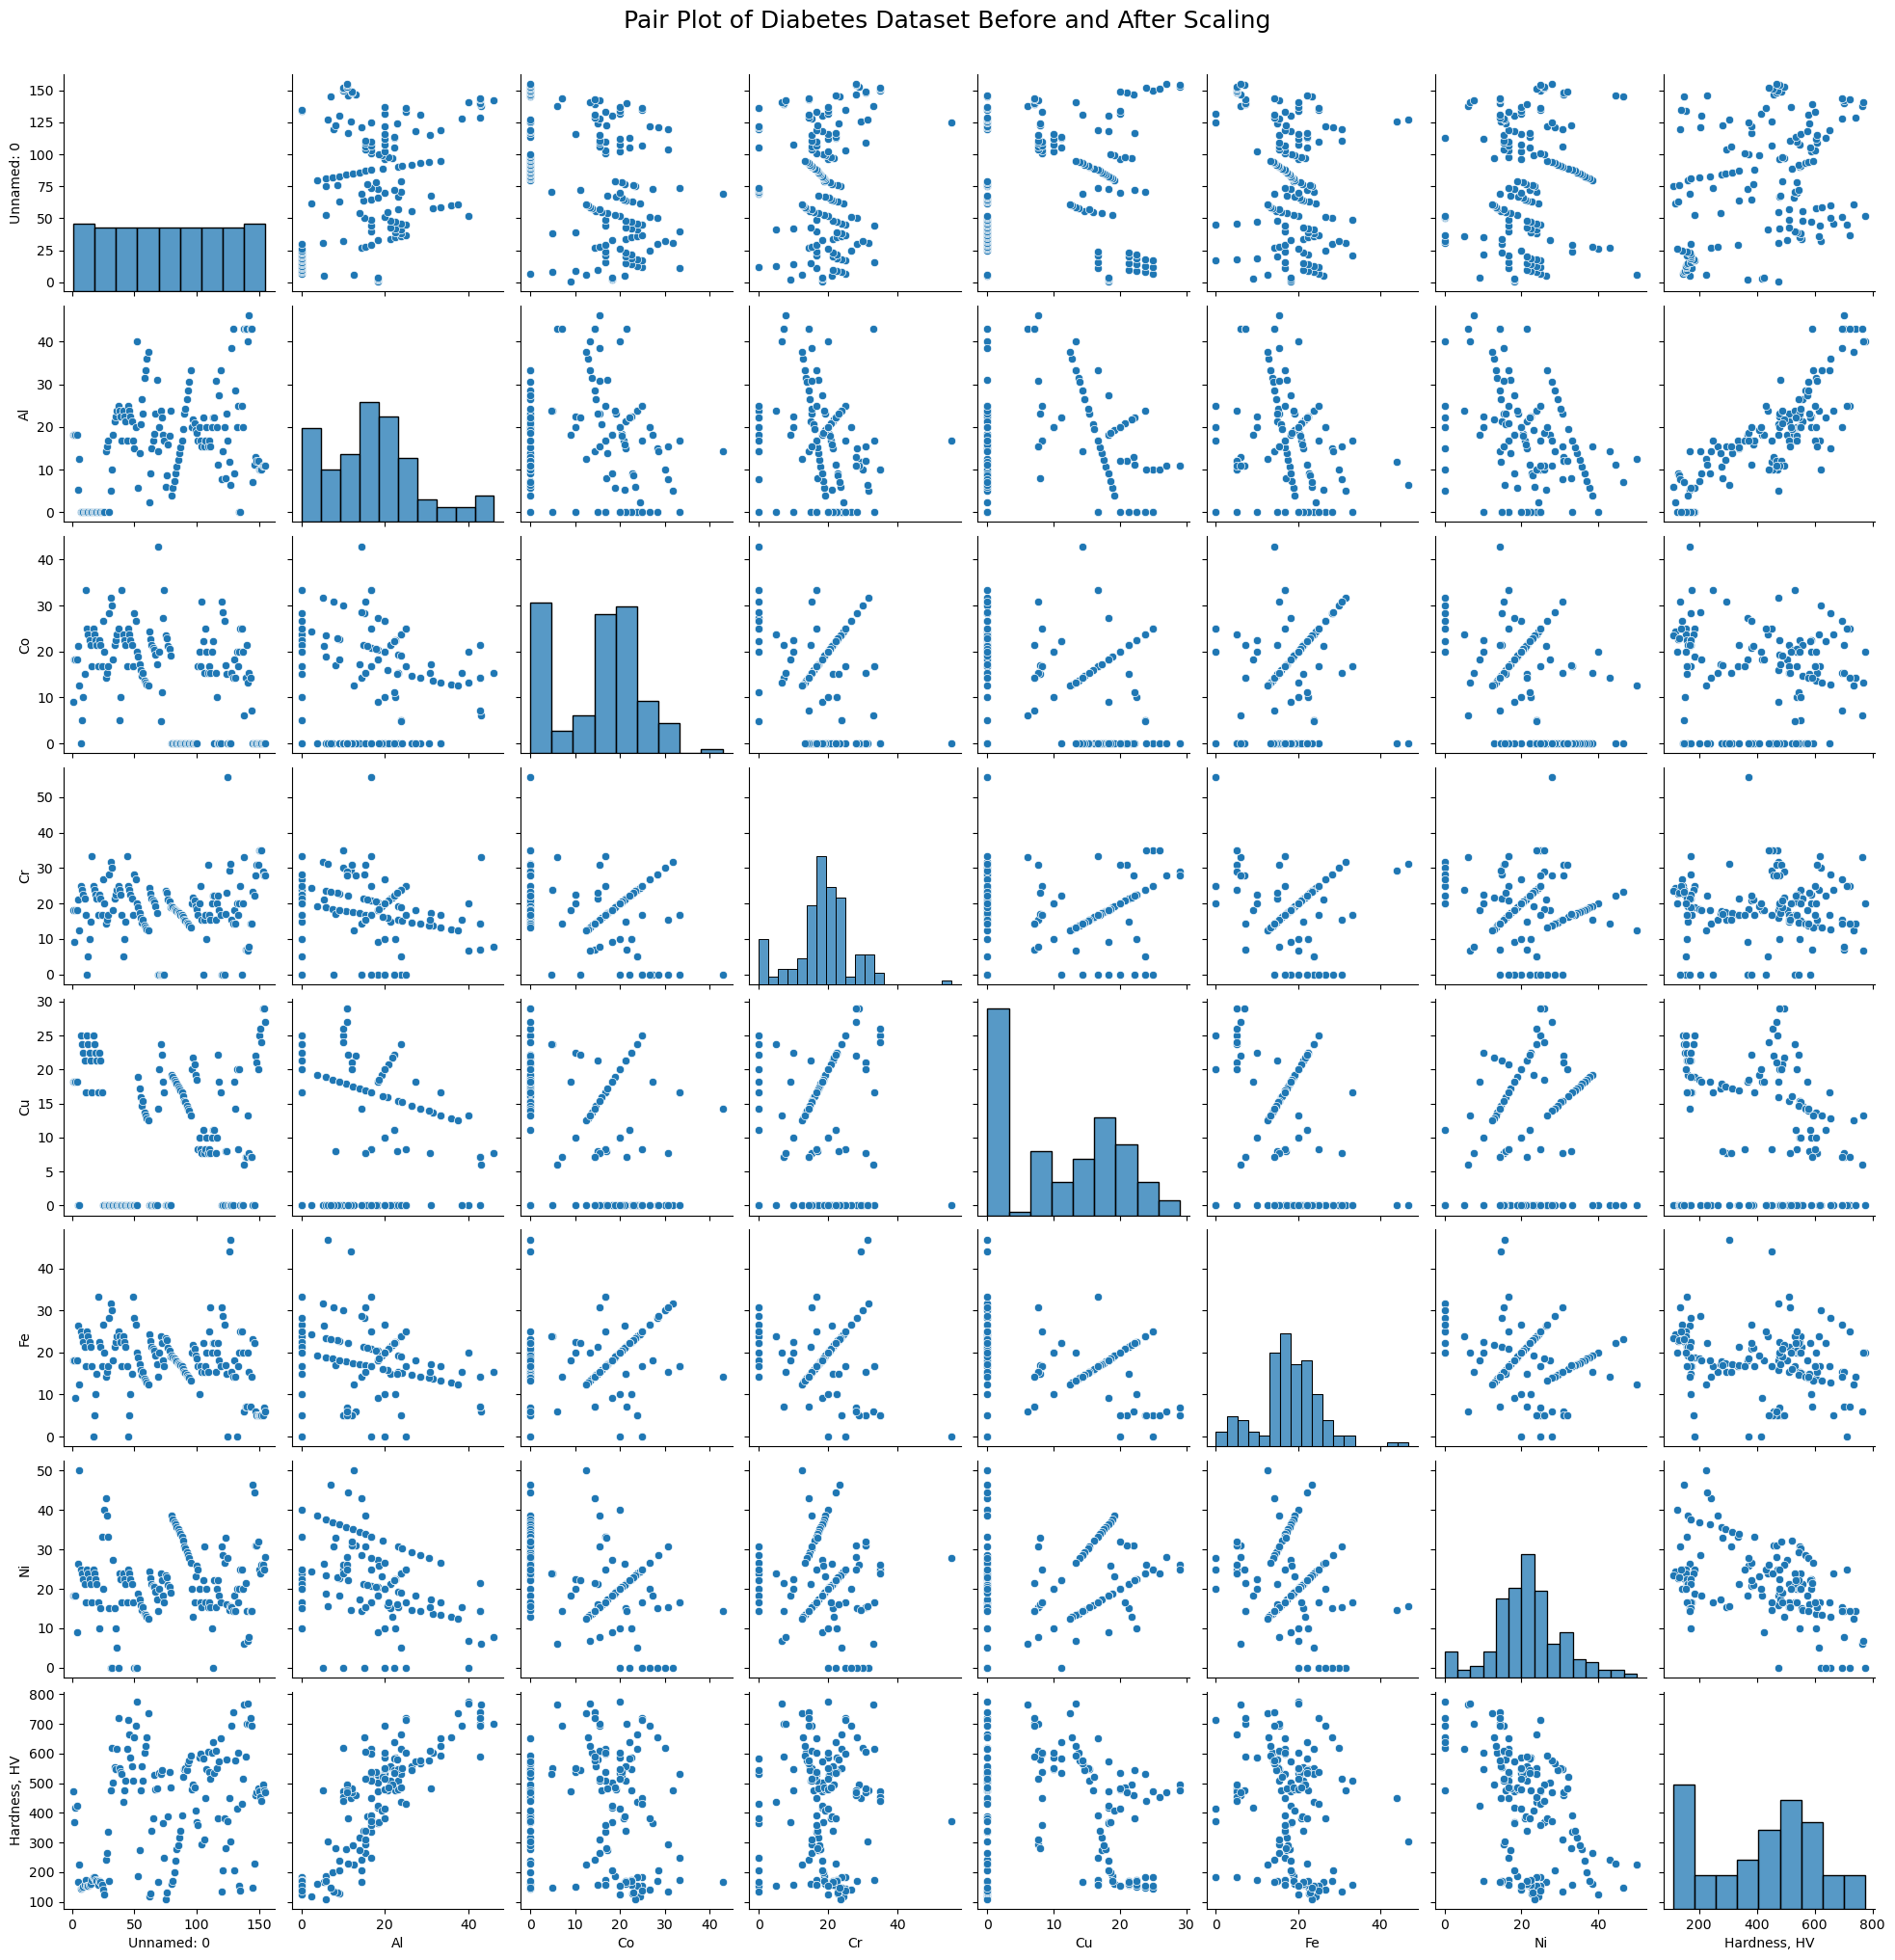

In [11]:
# Visualizing data before and after scaling with a pair plot
import seaborn as sns
plt.figure(figsize=(8, 8));
sns.pairplot(data=df)
plt.suptitle('Pair Plot of Diabetes Dataset Before and After Scaling', y=1.02, fontsize=18);
plt.show();

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x_train)

# 如果你也想標準化目標變量
# scaler_y = StandardScaler()
# Y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# x_train, x_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=200)


## Build ANN model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
    # Dense(1, input_shape=(1,), activation='linear')
#     Dense(5, input_shape=(x.shape[1],), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(x.shape[1],), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

# Sequential.help

model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')


## Training ANN model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=2)
history = model.fit(x_scaled, y_train, validation_split=0.2, epochs=200, batch_size=2)

Epoch 1/200
50/50 [==============================] - 1s 4ms/step - loss: 228237.7344 - val_loss: 163011.8125
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 223107.8594 - val_loss: 157229.1875
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 212016.0000 - val_loss: 146050.6250
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 192765.7344 - val_loss: 126618.7969
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 161250.5312 - val_loss: 98366.1562
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 119172.7266 - val_loss: 64719.8633
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 74640.5625 - val_loss: 33989.6055
Epoch 8/200
50/50 [==============================] - 0s 2ms/step - loss: 39628.2812 - val_loss: 16520.8457
Epoch 9/200
50/50 [==============================] - 0s 2ms/step - loss: 20857.3594 - val_loss: 9440.6533
Epoch 10/200
50/50 [========

## Model evaluation

In [16]:
history.history['loss'][:10]

[228237.734375,
 223107.859375,
 212016.0,
 192765.734375,
 161250.53125,
 119172.7265625,
 74640.5625,
 39628.28125,
 20857.359375,
 13925.408203125]

1/1 [==============================] - 0s 116ms/step - loss: 2246467.5000


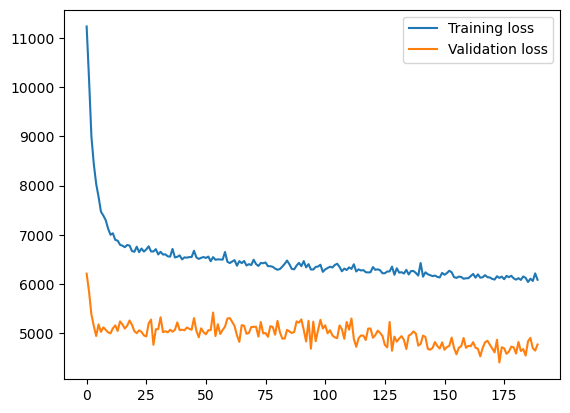

In [17]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 绘制训练历史
plt.plot(history.history['loss'][10:], label='Training loss')
plt.plot(history.history['val_loss'][10:], label='Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 89ms/step


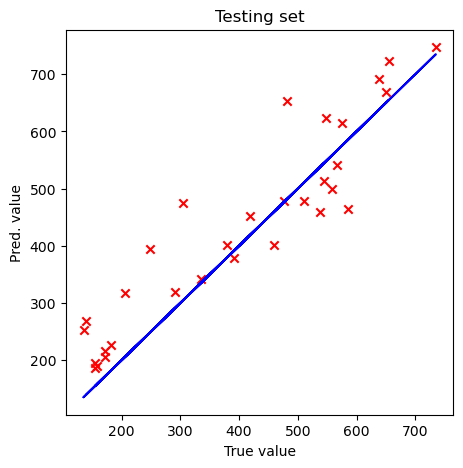

4/4 [==============================] - 0s 3ms/step


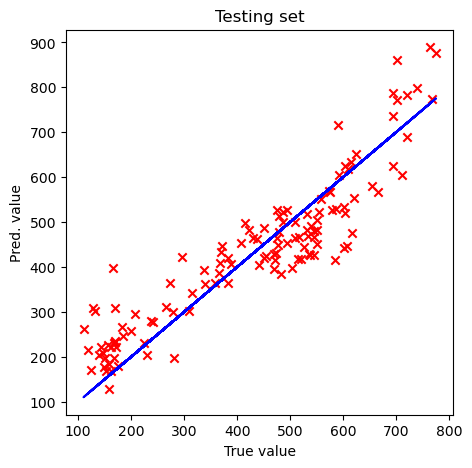

R2=(0.8378790713658049, 0.8304264534429213), Pearson=(0.9162341556042753, 0.9286039246998173) for training and testing sets


In [18]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    

# y_pred = model.predict(x_test)
# plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

# y_pred = model.predict(x_train)
# plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)

def pred(scaler_x, x):
    x_scaled = scaler_x.fit_transform(x)
    return model.predict(x_scaled)
    
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.feature_selection import r_regression

y_pred = pred(scaler_x, x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)
r2_test = r2_score(y_test, y_pred)
psc_test = r_regression(y_test.to_numpy().reshape(-1, 1) , y_pred.ravel())[0]

y_pred = pred(scaler_x, x_train)
plot_scatter(y_train, y_pred, "Testing set", "True value", "Pred. value",1)
r2_train = r2_score(y_train, y_pred)
psc_train = r_regression(y_train.to_numpy().reshape(-1, 1), y_pred.ravel())[0]

## Coefficient of determination, denoted R2
print(f"R2={r2_train, r2_test}, Pearson={psc_train, psc_test} for training and testing sets")


4/4 [==============================] - 0s 3ms/step


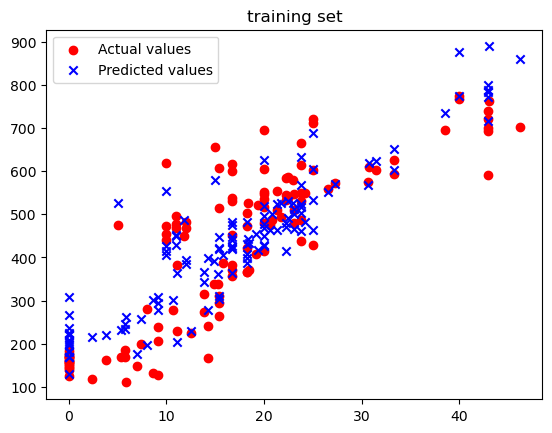

1/1 [==============================] - 0s 24ms/step


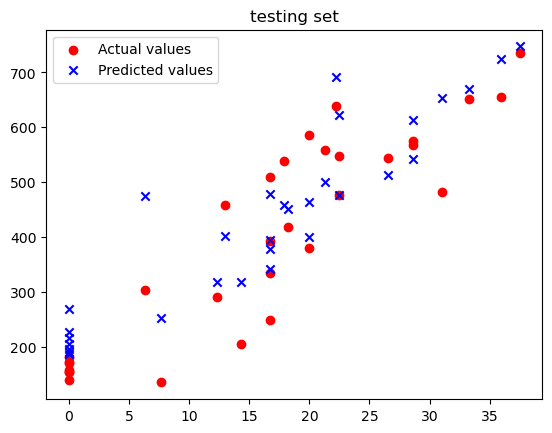

In [19]:
# y_pred = model.predict(x_train)
y_pred = pred(scaler_x, x_train)

plt.scatter(x_train['Al'], y_train, color='red', label='Actual values')
plt.scatter(x_train['Al'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


y_pred = model.predict(x_test)
y_pred = pred(scaler_x, x_test)

plt.scatter(x_test['Al'], y_test, color='red', label='Actual values')
plt.scatter(x_test['Al'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()